In [59]:
from spacepy import pycdf
import numpy as np

cdf = pycdf.CDF("../input/l1_cdf_data_l2.cdf")
for var in cdf:
    print(f"{var}: shape={np.shape(cdf[var][:])}")
    print(cdf[var][:])

bitstring_index: shape=(10,)
[ 1  2  3  4  5  6  7  8  9 10]
total_counts_per_energy: shape=(10, 16, 45)
[[[24689. 21137. 19692. ... 21293. 22658. 20239.]
  [22498. 19662. 22980. ... 21776. 22263. 18591.]
  [19982. 21379. 22458. ... 18249. 24722. 20201.]
  ...
  [22367. 21912. 21142. ... 22750. 24472. 21632.]
  [20957. 21458. 20802. ... 24023. 18727. 23028.]
  [21459. 23887. 22156. ... 22514. 22219. 19719.]]

 [[23539. 23111. 22061. ... 19524. 17147. 18758.]
  [21319. 17631. 19877. ... 22150. 21360. 20093.]
  [18951. 17120. 22211. ... 23215. 19226. 22631.]
  ...
  [22245. 15804. 21830. ... 21503. 21089. 23661.]
  [22918. 18897. 21999. ... 21126. 20967. 16228.]
  [17433. 25180. 20880. ... 22896. 23922. 21479.]]

 [[23436. 19218. 19327. ... 18254. 21615. 22787.]
  [20226. 20514. 21036. ... 21859. 21724. 21131.]
  [18602. 21954. 20816. ... 16919. 21141. 20861.]
  ...
  [22467. 18818. 18107. ... 20416. 23069. 20135.]
  [23572. 20301. 23448. ... 17774. 21116. 20139.]
  [21295. 22302. 21517.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from spacepy import pycdf

In [61]:
cdf_path = "../input/l1_cdf_data_l2.cdf"
cdf = pycdf.CDF(cdf_path)

# 查看變數列表
print(list(cdf))

# 取得 shape
total_counts_all = cdf["total_counts_per_energy"][:]   # shape => (num_bitstrings, 16, 45)
mean_counts_all  = cdf["mean_counts_per_energy"][:]    # shape => (num_bitstrings, 16, 45)
bitstring_index  = cdf["bitstring_index"][:]           # shape => (num_bitstrings,)
time_data = cdf["epoch"][:]  
# time_data = time_data.astype('O')  
cdf.close()

['bitstring_index', 'total_counts_per_energy', 'mean_counts_per_energy', 'epoch', 'duration']


In [62]:
print(total_counts_all.shape)
print(mean_counts_all.shape)
print(bitstring_index.shape)
print(time_data[0])

(10, 16, 45)
(10, 16, 45)
(10,)
[1743608565518 1743608645518 1743608725518 1743608805518 1743608885518
 1743608965518 1743609045518 1743609125518 1743609205518 1743609285518
 1743609365518 1743609445518 1743609525518 1743609605518 1743609685518
 1743609765518 1743609845518 1743609925518 1743610005518 1743610085518
 1743610165518 1743610245518 1743610325518 1743610405518 1743610485518
 1743610565518 1743610645518 1743610725518 1743610805518 1743610885518
 1743610965518 1743611045518 1743611125518 1743611205518 1743611285518
 1743611365518 1743611445518 1743611525518 1743611605518 1743611685518
 1743611765518 1743611845518 1743611925518 1743612005518 1743612085518]


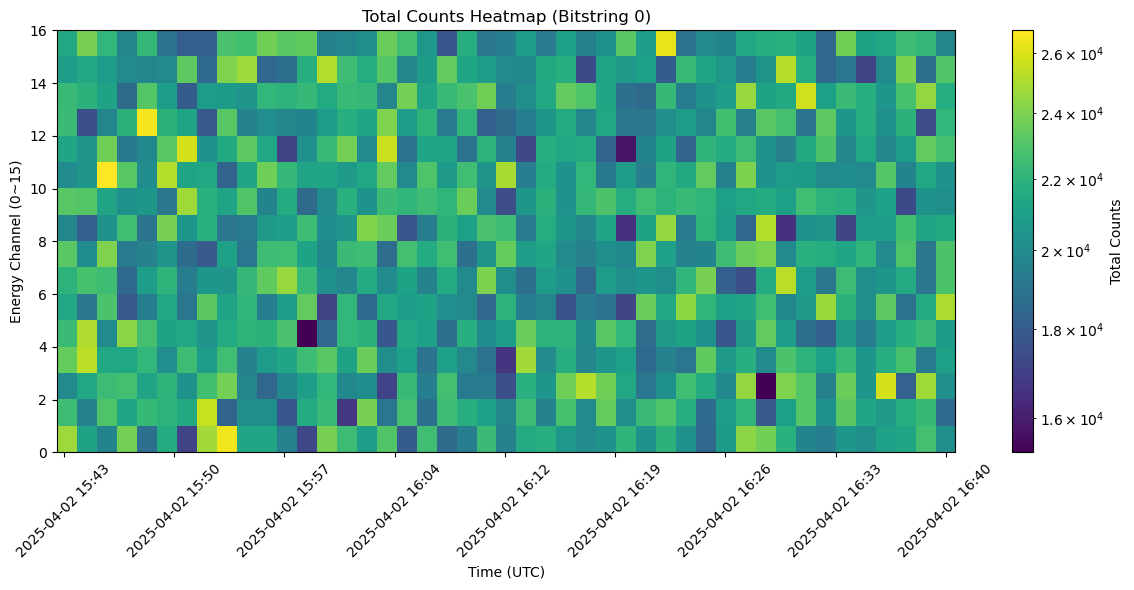

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from spacepy import pycdf  
import datetime

cdf_path = "../input/l1_cdf_data_l2.cdf"
cdf = pycdf.CDF(cdf_path)

total_counts_all = cdf["total_counts_per_energy"][:]   
time_data = cdf["epoch"][:]  

cdf.close()

counts = total_counts_all[0]  # shape: (16, 45)
time_data = np.ravel(time_data[0])  # shape: (45,)

if np.max(time_data) > 10**15:
    time_data = time_data / 10**6
elif np.max(time_data) > 10**12:
    time_data = time_data / 10**3

time_data = [datetime.datetime.utcfromtimestamp(t) for t in time_data]

fig, ax = plt.subplots(figsize=(12, 6))

im = ax.imshow(counts, aspect='auto', origin='lower',
               extent=[mdates.date2num(time_data[0]), mdates.date2num(time_data[-1]), 0, 16],
               cmap='viridis', norm=plt.cm.colors.LogNorm())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)
ax.set_xlabel("Time (UTC)")
ax.set_ylabel("Energy Channel (0~15)")

fig.colorbar(im, ax=ax, label="Total Counts")
plt.title("Total Counts Heatmap (Bitstring 0)")
plt.tight_layout()
plt.show()


C:\Users\wangj\AppData\Local\Temp\ipykernel_12368\3886634986.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


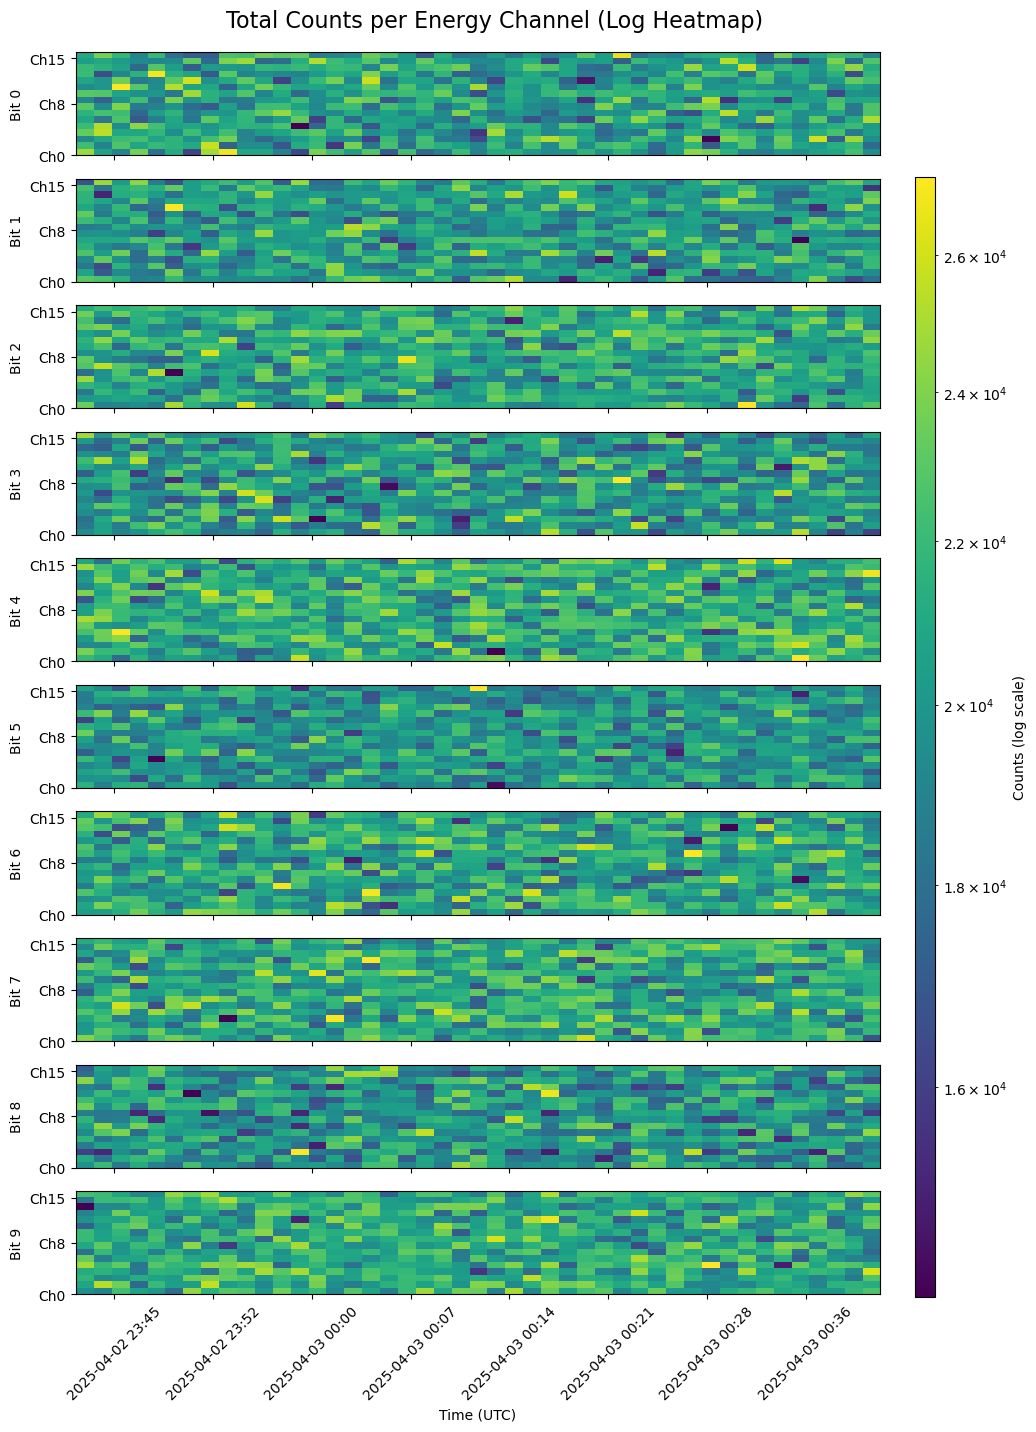

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from spacepy import pycdf  
import datetime

cdf_path = "../input/l1_cdf_data_l2.cdf"
cdf = pycdf.CDF(cdf_path)

total_counts_all = cdf["total_counts_per_energy"][:]  # (10, 16, 45)
time_data = cdf["epoch"][:]                           # (10, 45)
cdf.close()

time_raw = np.ravel(time_data[0])

# milisecond to second
if np.max(time_raw) > 10**15:
    time_raw = time_raw / 1e6
elif np.max(time_raw) > 10**12:
    time_raw = time_raw / 1e3

# second to datetime
time_dt = [datetime.datetime.fromtimestamp(t) for t in time_raw]
x_start = mdates.date2num(time_dt[0])
x_end = mdates.date2num(time_dt[-1])

fig, axes = plt.subplots(10, 1, figsize=(10, 14), sharex=True, sharey=True)

energy_channels = np.arange(16)  
y_ticks = [0, 8, 15]  
y_labels = [f"Ch{ch}" for ch in y_ticks]  


for i, ax in enumerate(axes):
    counts = total_counts_all[i]  # shape: (16, 45)

    im = ax.imshow(counts, aspect='auto', origin='lower',
                   extent=[x_start, x_end, 0, 16],
                   cmap='viridis', norm=plt.cm.colors.LogNorm())

    # set each plot's y_label
    ax.set_ylabel(f"Bit {i}")  
    ax.set_yticks(y_ticks)
    # channel name
    ax.set_yticklabels(y_labels)  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.xticks(rotation=45)


# set time label
axes[-1].set_xlabel("Time (UTC)")

cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  
fig.colorbar(im, cax=cbar_ax, orientation='vertical', label="Counts (log scale)")

plt.tight_layout(rect=[0, 0, 0.9, 1])  
plt.suptitle("Total Counts per Energy Channel (Log Heatmap)", fontsize=16, y=1.02)
plt.show()


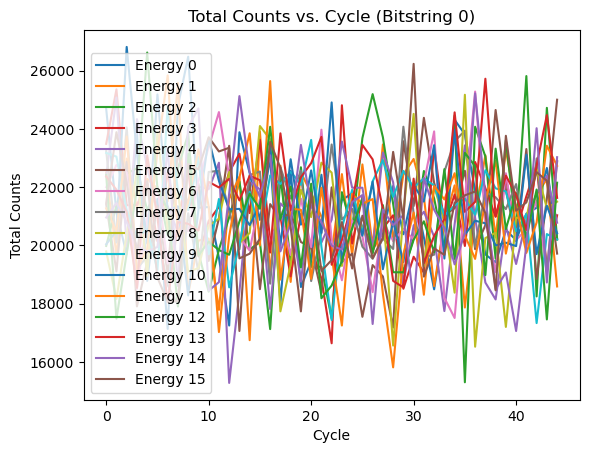

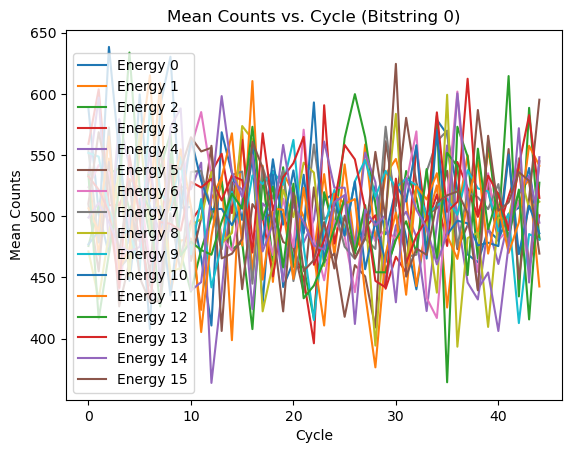

In [65]:

# 先抓第0筆bitstring的數據 => shape: (16, 45)
# 16 = energy channel, 45 = cycles
total_counts_0 = total_counts_all[0]  
mean_counts_0  = mean_counts_all[0]

# 產生 x 軸 (cycle 0~44)
x = np.arange(total_counts_0.shape[1])  # shape[1] = 45


plt.figure()  # 開啟一個新的繪圖窗口
for e in range(total_counts_0.shape[0]):  # e 從 0 到 15
    plt.plot(x, total_counts_0[e], label=f"Energy {e}")

plt.title("Total Counts vs. Cycle (Bitstring 0)")
plt.xlabel("Cycle")
plt.ylabel("Total Counts")
plt.legend()
plt.show()  

plt.figure()  
for e in range(mean_counts_0.shape[0]):
    plt.plot(x, mean_counts_0[e], label=f"Energy {e}")

plt.title("Mean Counts vs. Cycle (Bitstring 0)")
plt.xlabel("Cycle")
plt.ylabel("Mean Counts")
plt.legend()
plt.show() 

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from spacepy import pycdf  
import datetime

def plot_cdf_heatmap(cdf_path):
    """
    Load a CDF file and plot total counts per energy channel over time as log-scale heatmaps.

    Parameters:
    cdf_path (str): Path to the CDF file
    """

    # Load CDF file
    cdf = pycdf.CDF(cdf_path)
    total_counts_all = cdf["total_counts_per_energy"][:]  # Shape: (10, 16, 45)
    time_data = cdf["epoch"][:]                           # Shape: (10, 45)
    cdf.close()

    # Use time from the first bitstring (assuming all have the same time axis)
    time_raw = np.ravel(time_data[0])

    # Convert from microseconds or milliseconds to seconds if necessary
    if np.max(time_raw) > 10**15:
        time_raw = time_raw / 1e6
    elif np.max(time_raw) > 10**12:
        time_raw = time_raw / 1e3

    # Convert to datetime format
    time_dt = [datetime.datetime.utcfromtimestamp(t) for t in time_raw]
    x_start = mdates.date2num(time_dt[0])
    x_end = mdates.date2num(time_dt[-1])

    # Create subplots for each bitstring
    fig, axes = plt.subplots(10, 1, figsize=(10, 14), sharex=True, sharey=True)

    # Y-axis ticks and labels
    y_ticks = [0, 8, 15]
    y_labels = [f"Ch{ch}" for ch in y_ticks]

    for i, ax in enumerate(axes):
        counts = total_counts_all[i]  # Shape: (16, 45)

        im = ax.imshow(counts, aspect='auto', origin='lower',
                       extent=[x_start, x_end, 0, 16],
                       cmap='viridis', norm=plt.cm.colors.LogNorm())

        ax.set_ylabel(f"Bit {i}")
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_labels)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    # Set x-axis label for the bottom plot
    axes[-1].set_xlabel("Time (UTC)")
    plt.xticks(rotation=45)

    # Add a shared colorbar
    cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
    fig.colorbar(im, cax=cbar_ax, orientation='vertical', label="Counts (log scale)")

    # Layout and title
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.suptitle("Total Counts per Energy Channel (Log Heatmap)", fontsize=16, y=1.02)
    plt.show()


C:\Users\wangj\AppData\Local\Temp\ipykernel_12368\1784718730.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


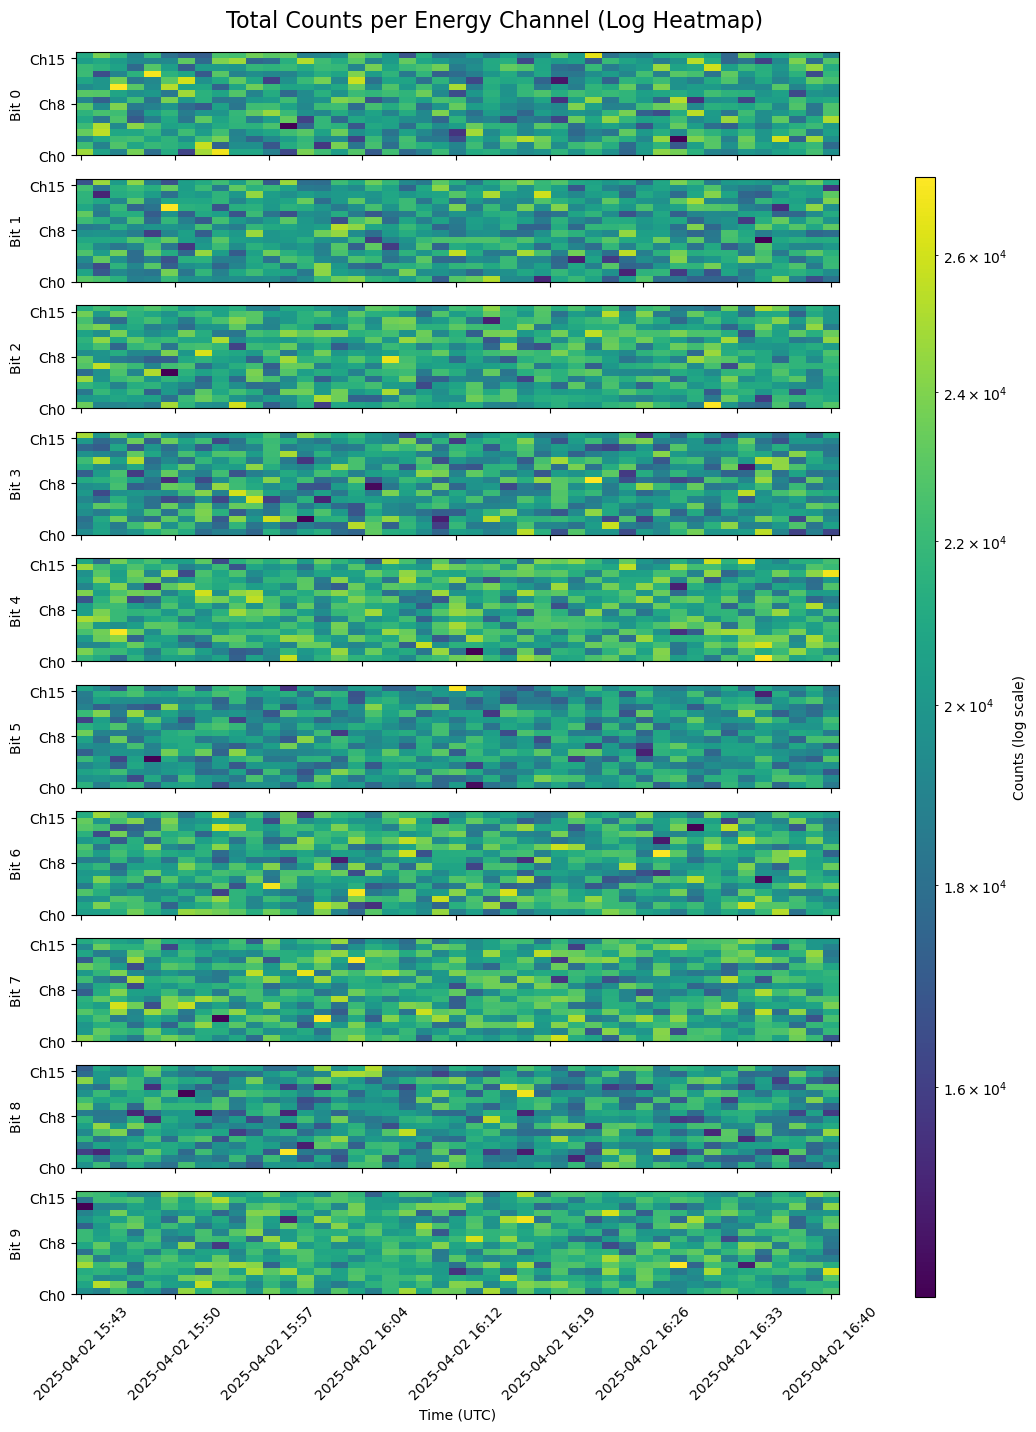

In [ ]:
plot_cdf_heatmap("../input/l1_cdf_data_l2.cdf")